# Computer Vision - 101

In this notebook, we will study some of the core concepts behind computer vision. The tools we're going to use are based on Opencv-library. 

The first half of this study is about basics on image processing. 

In [2]:
#Loading the tools
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


print("Libraries ok!")

Libraries ok!


## Basics on digital images
As you may know, images are an matrix of pixels. Each pixel value represents the intensity in a scale 0-263 for a 8-bit image.
RGB, colored, images are essencialy three matrices, each for a color layer,i.e one matrix for Red, one for Green, one for Blue. 

Depending on the tool used, the order of the matrices may be interpreted as BGR, i.e. the first channel is the Blue, then comes the Green and later the Red. This is the case for Opencv. What this means is that in some cases the channel orders may have to be treated. This is particularly true when we try to plot an RGB image using the method `plt.imshow`, but the image was loaded with openCV using `cv2.imread` . 

Finally, it is commom in image processing, treating the images as a single layer, i.e. gray image, for that, there is a simple way to merge all three channels (RGB) as a single mono-chromatic layer `cv2.cvtColor()` is a versityle method for converting either BGR-images into gray-scale images or  into RGB-images.

In [3]:
#Treating the file path
cwd = os.getcwd()
my_image = "images\lenna.png"
image_path = os.path.join(cwd,my_image)
print("Image path is: " + image_path)

#Loading the image in the program
if os.path.isfile(image_path):
    image = cv.imread(image_path)
#Converting from BGR to grayscale
    image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    print("Image loaded!")
else:
    print("File does not exist")



Image path is: C:\Users\hugo.medeiros\OneDrive\Academico\Udacity\computer-vision-tutorial\images\lenna.png
Image loaded!


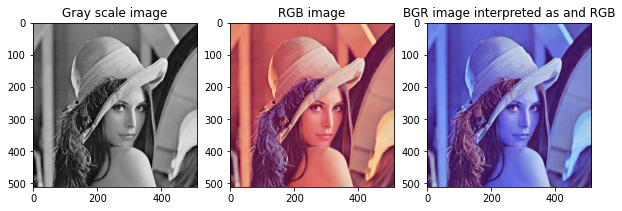

In [4]:
#Displaying the image
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(image_gray,cmap='gray'),plt.title("Gray scale image")
plt.subplot(132),plt.imshow(image_rgb),plt.title("RGB image")
plt.subplot(133),plt.imshow(image),plt.title("BGR image interpreted as and RGB")
plt.show()

One may visualize an image as a surface. The following piece of code treates an image as a surface

As you may see in the third image, when the channel order is not treated, the image is still colorfull, however its colors are particularly odd.

In [5]:
z = image_gray.copy()


x = np.arange(0,z.shape[0],1)
y = np.arange(0,z.shape[1],1)

fig = go.Figure(data=[go.Surface(z=z,x=x,y=y)])

fig.show()


### Croping an Image
As you may guest, given that an image is this simply an array of numbers, which represents a brightness intesity, if one were to crop the image, he/she would just index the matrix to crop part of the image he/she want.

**Note: When dealing with matrices in python, beware of copying them with the `.copy()` methods, otherwise the original image will be altered**

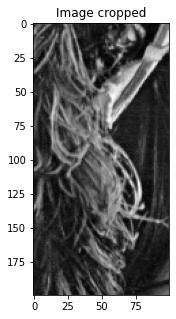

In [7]:
## Croping an image
image_crop = image_gray[300:500,100:200].copy()

plt.figure(figsize=(5,5))
plt.imshow(image_crop,cmap='gray'),plt.title("Image cropped")
plt.show()

### Some usefull methods from openCV
Here are some miscelenious methods that I have come across, and would be nice to keep them.

# Image Convolution/Image Correlation - Kernel

The main fundamental operations applied to images are either **correlation or convolution**. Both operations consist of sliding a smaller matrix across the image to be transformed. As the matrix, also known as **Kernel**, slides trought, a new pixel is computed based on some matrix multiplication. 

![Correlation vs Convolution](images/correlation-vs-convolution.png)


Deppeding on the kernel one is using, for example a simetric kernel such as a gaussian, flipping the kernel won't cause any difference. However, when dealing with assymetric kernel operations, as in *image derivatives*, this flipping effect matters.

### Normalized Correlation

The simplest form of pattern detection is via a *template matching* technique. 

Imagine you want to identify which portion of the image matches the most with some template. If we *convolve the tamplate accross the large image* we would get a **correlation map** which indicates which portion of the image is the most correlated with the template. 

Original Image size: (512, 512)
Template size: (200, 100)
Correlation Map size: (313, 413)


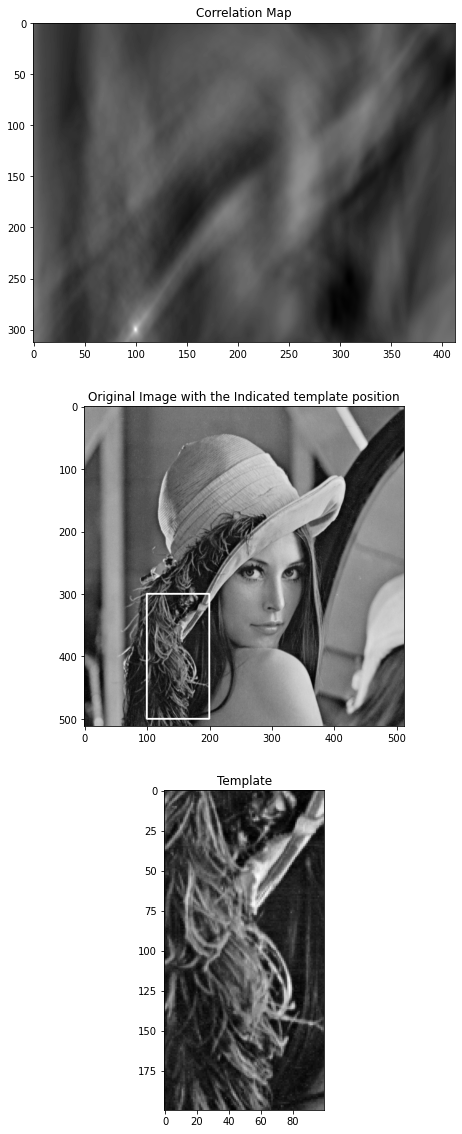

In [19]:
## Template matching

#Copying the variables
img = image_gray.copy()
template = image_crop.copy()
w,h = template.shape

#Convolving the template to the image and generating a correlation map
res = cv.matchTemplate(img,image_crop,cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

#Drawing a rectangle in the original image, just for visualization
top_left = max_loc
bottom_right = (top_left[0]+h,top_left[1]+w)
cv.rectangle(img, top_left, bottom_right, (255,0,0), 2)

#Image shapes
print("Original Image size: " + str(img.shape))
print("Template size: " + str(template.shape))
print("Correlation Map size: " + str(res.shape))

#Displaying the results
plt.figure(figsize=(20,20))
plt.subplot(311),plt.imshow(res,cmap = 'gray'),plt.title("Correlation Map")
plt.subplot(312),plt.imshow(img,cmap = 'gray'),plt.title("Original Image with the Indicated template position")
plt.subplot(313),plt.imshow(template,cmap = 'gray'),plt.title("Template")
plt.show()

In the example above, the **correlation map is expected to have a smaller dimension than the original image**. This happens because of the edge effect.

![correlation-map](images/correlation-map.png)

## Edge Detection

Image edges may be interpreted as steep surfaces. Take a look at the following image:

![edge-view](images/edge-view.png)

The fundamental principle behind edge detection is that edges are consequence of a rapid variance in intesity levels. Consider the following example in which we are 'slicing' one row of an image.

The white line indicates a row from the portion of the image we are analyzing.

## Analyzing a Single Row

Here we are going to focus the analysis in one single isoleted row, so that we can note the effect of derivatives in indicating edges. 

*note: We are refering to derivatives as if this were a continous signal. Keep in mind that were are using finite difference for such operation. More on that later*.

Original Image size: (50, 60)


(<AxesSubplot:title={'center':'Intensity of the pixels in the line'}>,
 Text(0.5, 1.0, 'Intensity of the pixels in the line'))

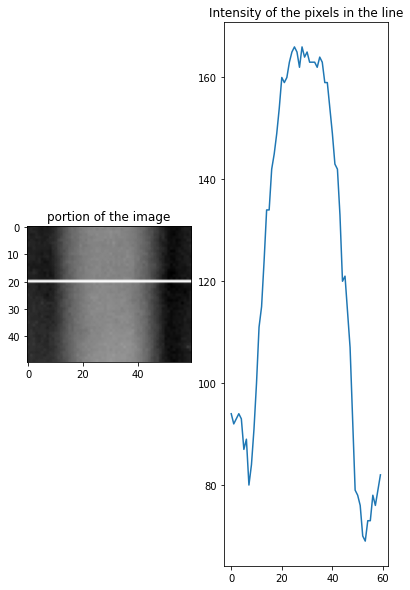

In [24]:
#Slicing a small portion from the image
image_portion = image_gray[100:150,15:75].copy()

#Dimensions
print("Original Image size: "+str(image_portion.shape));

#Reading the values from row number 20
x = np.arange(0,60,1)
y = image_portion[20,:].copy()

#Drawing a line for indication
cv.line(image_portion,(0,20),(75,20),(255,0,0))


#Ploting the views
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(image_portion,cmap="gray"),plt.title("portion of the image")
plt.subplot(132),plt.plot(x,y),plt.title("Intensity of the pixels in the line")

If one were to take the derivative of the above signal, that would be:

(59,)(60,)


(<AxesSubplot:title={'center':'Derivative from the funtion on the left'}>,
 (0.0, 60.0),
 Text(0.5, 1.0, 'Derivative from the funtion on the left'))

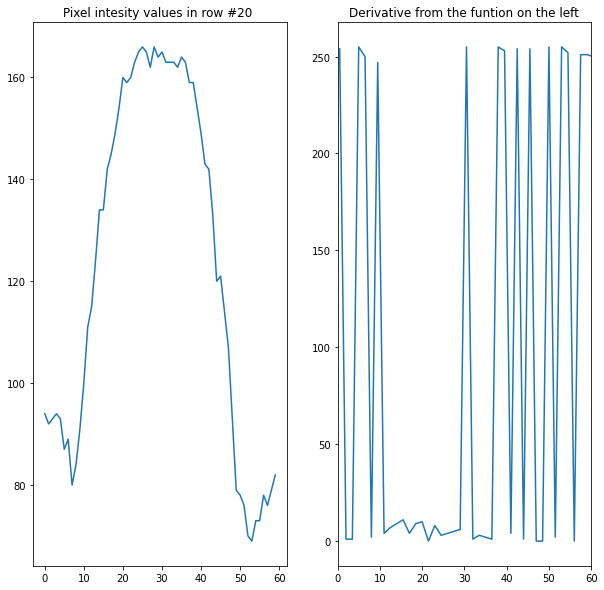

In [26]:
#Computing Derivative
yp= np.diff(y) /np.diff(x)
xp = np.array(x[:-1]) + np.array(x[1:])/2

print(str(yp.shape) + str(y.shape))

#Printing the results
plt.figure(figsize=(10,10))
plt.subplot(121),plt.plot(x,y),plt.title("Pixel intesity values in row #20 ")
plt.subplot(122),plt.plot(xp,yp),plt.xlim(0,60),plt.title("Derivative from the funtion on the left")

The effect of noise does impact on the analysis, that is one of the reasons why **we always apply some treatment on the image** . Commonly, a **gaussian-blur** is applied to the image to **smooth-out** the edges as you may see in the following example. This process is also known as **Denoising an image**.

(<AxesSubplot:title={'center':'Derivative'}>,
 (0.0, 60.0),
 Text(0.5, 1.0, 'Derivative'))

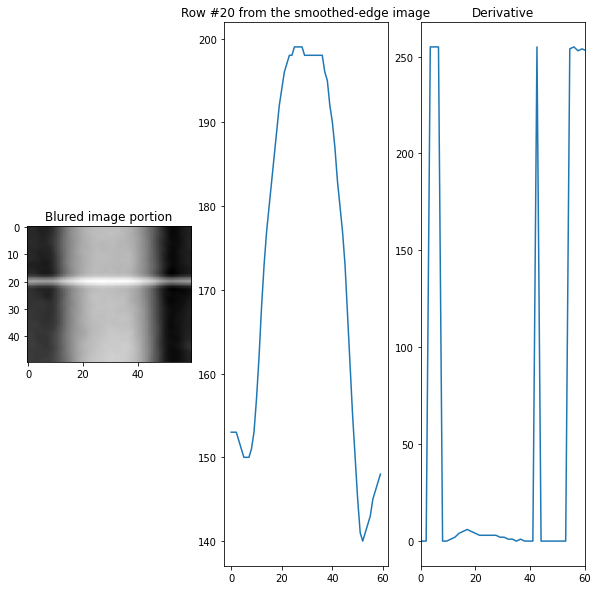

In [27]:
#Blurring the image with a gaussian blur
image_portion_blur = cv.GaussianBlur(image_portion,(5,5),0)

#Reducing noise with gaussian blur
x_2 = np.arange(0,60,1)
y_2 = image_portion_blur[20,:].copy()

#Computing Derivative
yp_2= np.diff(y_2) /np.diff(x_2)
xp_2 = np.array(x_2[:-1]) + np.array(x_2[1:])/2
plt.figure(figsize=(10,10))
cv.line(image_portion,(0,20),(75,20),(255,0,0))
plt.subplot(131),plt.imshow(image_portion_blur,cmap="gray"),plt.title("Blured image portion")
plt.subplot(132),plt.plot(x_2,y_2),plt.title("Row #20 from the smoothed-edge image")
plt.subplot(133),plt.plot(xp_2,yp_2),plt.xlim(0,60),plt.title("Derivative")

As can be seen in the above picture, edges are detected in the 'transitions' from the image -- note between 0 and 20 in the x-axis.

## Image Gradients
The concept of gradients are strongly related to multi-varible calculus. In summary, when we have a function of more than one varible, such as an image - *f(x,y)*, we can take partial derivatives, e.g. the derivative in the X-axis/Y-axis/some desired direction.

Grandiant is an operator that returns a vector. This resulting-vector corresponds to the direction which the multi-variable function varies the most for a given location. For the tradicional X-Y-coordinate system, the gradient happens to be **<partial_derivative_x_diretion, partial_derivative_y_direction>**.

*Note: There are tons and tons of interesting properties/interpretations on what gradients are;what they represent and so on... . Here, I am only considering the bare-minimum core concepts enough for a image-processing tutorial. Some interesting links are: https://tutorial.math.lamar.edu/Classes/CalcIII/DirectionalDeriv.aspx; https://www.youtube.com/watch?v=GkB4vW16QHI; https://machinelearningmastery.com/a-gentle-introduction-to-partial-derivatives-and-gradient-vectors/*

The following image is a good memo with some examples of images that vary in a single direction, hence one of the gradient coordinates is zero; and an image which happens to have variation in both and y directions -- one may even associate an angle to it as in a polar-system cordinate.

![gradient-memo](images/gradient-memo.png)\

## Discrete Gradients

As in most of calculus theory, when we want to apply the concepts in the discrete world (computers), there are some nuances. Diferentiation operations for discrete signals.